# Early Results of the benchmark shown on the TK sample set

This notebook shows examplary the results of earlier stages of the benchmark. 

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import analysis_utils as au
import matplotlib.pyplot as plt

In [2]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS"]
superposer_TK_DFGin = pd.read_csv("../data/OpenCADD_results/first_results/superposer_benchmark_TK.csv", names=columns)

In [3]:
au.compute_rel_cov(superposer_TK_DFGin)

The next cell shows a scatter plot of the first results of the methods in OpenCADD.
MDA and Theseus both have poor results. At this point the benchmark was paused and further implementations were made in OpenCADD. The changes include a new sequence alignment tool for Theseus and MDA as well as the select option which allows the user to select specific parts of the structures for the computation. For the final results only the Carbon alpha atoms of the protein domain (mostly chain A) were taken into consideration.

In this scatter plot, MDA used a global alignment performed by the biotide implementation of the Needlemann-Wunsch algorithm with a linear gap cost of -10. Theseus used MUSCLE as the sequence alignment tool.

The calculations were performed on the whole structures.

For a detailed explanation of the poor results please refer to the bachelor thesis of Julian Pipart.

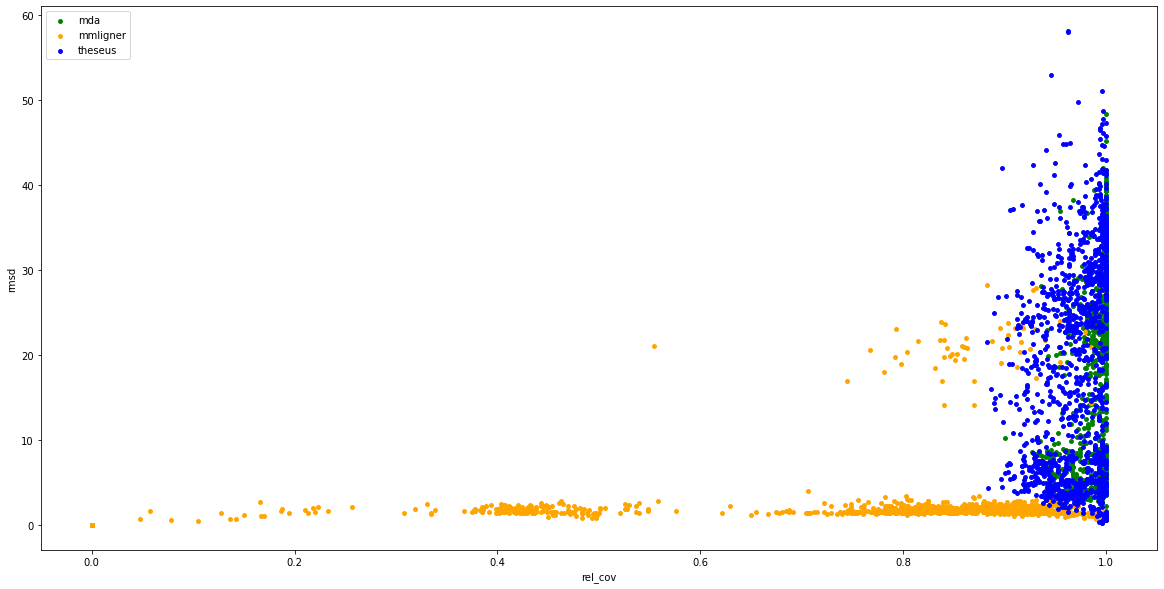

In [4]:
fig, ax = plt.subplots()
colors = {'mmligner':'orange', 'theseus':'blue', 'mda':'green'}
grouped = superposer_TK_DFGin.groupby('method')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='rel_cov', y='rmsd', label=key, color=colors[key], s = 15, figsize=(20, 10))

plt.show()

___

## Intermediate results

In [5]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_TK_DFGin_intermediate = pd.read_csv("../data/OpenCADD_results/intermediate_results/superposer_benchmark_TK.csv", names=columns)
pymol_TK_DFGin_intermediate = pd.read_csv("../data/PyMol_results/pymol_benchmark_CAMK.csv", names=columns)
chimerax_TK_DFGin_intermediate = pd.read_csv("../data/ChimeraX_results/mmaker_benchmark_CAMK.csv", names=columns)
all_TK_DFGin_intermediate = pd.concat([superposer_TK_DFGin_intermediate, pymol_TK_DFGin_intermediate, chimerax_TK_DFGin_intermediate]).reset_index(drop=True)

In [6]:
au.compute_rel_cov(all_TK_DFGin_intermediate)

The below two cells show plots for the results of the alignment performed between the structures of the Tk sample set.
MDA used the local alignment performed by the biotide implementation of the Smith-Waterman algorithm.

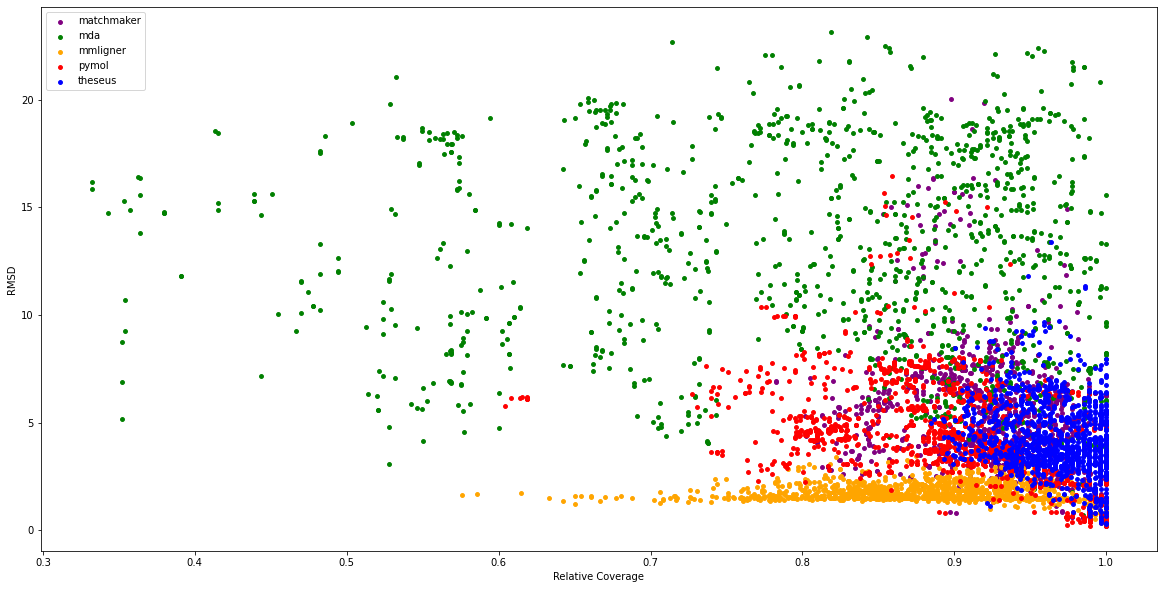

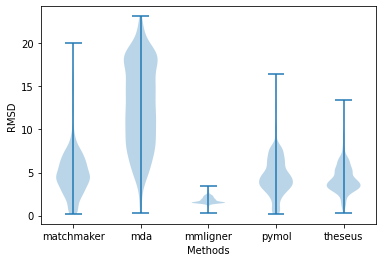

In [7]:
au.create_scatter_plot(all_TK_DFGin_intermediate)
au.create_violine_plot(all_TK_DFGin_intermediate)

Results of kstest:
KstestResult(statistic=0.86904384842752, pvalue=0.0)
KstestResult(statistic=0.8793489894288039, pvalue=0.0)
KstestResult(statistic=0.6430436980447974, pvalue=0.0)
KstestResult(statistic=0.6536723323795877, pvalue=0.0)


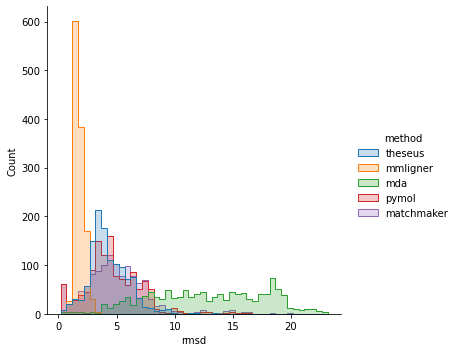

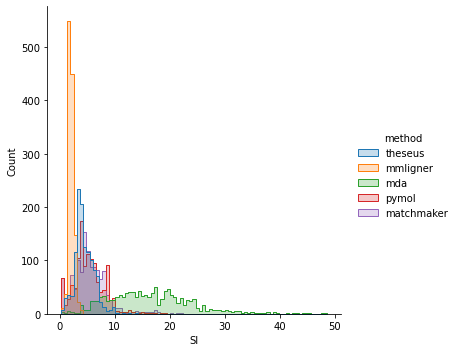

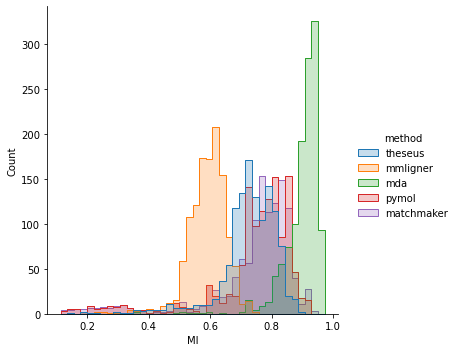

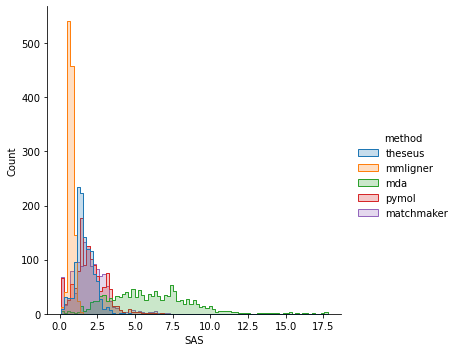

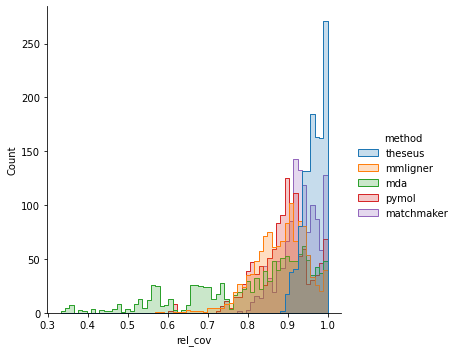

In [8]:
dist_tests = au.check_distribution(all_TK_DFGin_intermediate)

___

## Mean Values of Results of MDA on TK Structures Using Different Alignment Paramerters

Due to the poor performance of the MDA aligner, multiple different parameter sets and tools were tested for the sequence alignemnt.

In [9]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
mda_05 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_05.csv", names=columns)
mda_15 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_15.csv", names=columns)
mda_25 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_25.csv", names=columns)
mda_35 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_35.csv", names=columns)
mda_50 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_50.csv", names=columns)
mda_65 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_65.csv", names=columns)
mda_75 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_75.csv", names=columns)
mda_85 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_85.csv", names=columns)
mda_12 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_12_1.csv", names=columns)
mda_12_15 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_12_15.csv", names=columns)
mda_global = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_global_10_10.csv", names=columns)
mda_bug_clustalo = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_clustalo.csv", names=columns)
mda_local = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_local_10_10.csv", names=columns)
mda_local_05 = pd.read_csv("../data/OpenCADD_results/intermediate_results/mda_parameter_tests/mda_local_10_05.csv", names=columns)


all_mda = pd.concat([mda_05, mda_15, mda_25, mda_35, mda_50, mda_65, mda_75, mda_85, mda_12, mda_12_15, mda_global, mda_bug_clustalo, mda_local, mda_local_05]).reset_index(drop=True)


In [10]:
au.compute_rel_cov(all_mda)

The next cell shows the results of the tests for different parameters and tools for the sequence alignment used by the MDA aligner.
The entries are sorted ascending by the SI mean values. So the first row represents the best results in the mean for the SI values.

Since the MDA aligner yielded the best results when using Clustal Omega for the sequence alignment regarding all three quality measures SI, MI and SAS, Clustal Omega was chosen for the calculation of the alignments for the final results.

For a more detailed explanation please refer to the bachelor thesis of Julian Pipart.

In [11]:
round(all_mda.groupby("method").mean(),4).sort_values(by="SI")

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
mda_clustalo,4.0789,263.1722,285.7469,282.8131,0.3680,4.2424,0.7171,1.5451,0.9644
mda_global_12_1,5.1798,262.1290,285.7469,282.8131,0.4844,5.4209,0.7542,1.9724,0.9605
mda_global_10_15,5.1835,261.4155,285.7469,282.8131,0.4011,5.4409,0.7553,1.9800,0.9579
mda_global_12_15,5.2092,262.1282,285.7469,282.8131,0.5111,5.4518,0.7554,1.9837,0.9605
mda_global_10_25,5.2865,262.7845,285.7469,282.8131,0.3759,5.5132,0.7555,2.0062,0.9629
mda_global_10_35,5.4481,263.4539,285.7469,282.8131,0.3848,5.6645,0.7591,2.0617,0.9653
mda_global_10_05,5.4011,250.8449,285.7469,282.8131,0.4151,5.9641,0.7715,2.1723,0.9194
mda_global_10_50,5.8768,264.7624,285.7469,282.8131,0.3977,6.0716,0.7646,2.2059,0.9700
mda_global_10_65,6.1976,265.3910,285.7469,282.8131,0.3917,6.3799,0.7709,2.3176,0.9723
